<h1> Homework 8: Numerical Differentiaon Equations I <h1>

**Problem 1**

Solve numerically the following differential equations for $x(t)$:

(a) $\dot{x}=t-x^2$ with $x(0)=1$. Note that a dot represents derivative with respect to $t$.

(b) $\dot{x}=e^{-x\,t}$ with $x(0)=1$. 

(c) $\dot{x}=x^2 t^2+1$ with $x(0)=1$.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def trapezoidal_method(f, y0, t):
    '''
    Trapezoidal method for solving ODEs from Prof Sahakian
    '''
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        y[i] = y[i - 1] + 0.5 * h * (f(t[i - 1], y[i - 1]) + f(t[i], y[i - 1] + h * f(t[i - 1], y[i - 1])))

    return y

from scipy.optimize import newton

def implicit_trapezoidal_method(f, y0, t):
    '''
    Implicit Trapezoidal method for solving ODEs from Prof Sahakian
    '''
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    h = t[1] - t[0]


    for i in range(1, n):
        def implicit_eq(y_next):
            return y[i-1] + 0.5 * h * (f(t[i-1], y[i-1]) + f(t[i], y_next)) - y_next

        y[i] = newton(implicit_eq, y[i-1])
    return y

def doaplot(t, y):
    plt.figure(figsize=(7, 4))
    plt.plot(t, y, label='Numerical Solution')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

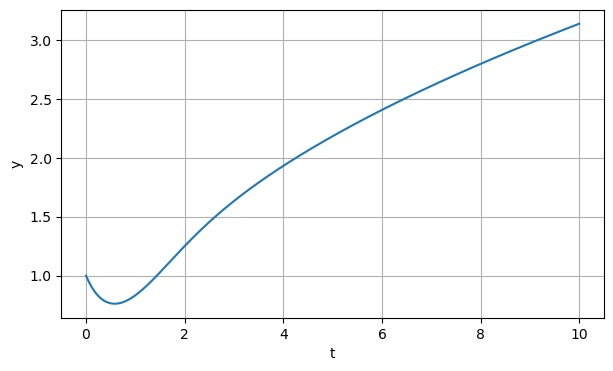

In [6]:
# (a)

def f(t, x):
    # x' = t - x^2
    return t - (x ** 2)

t = np.linspace(0, 10, 1000)
x = trapezoidal_method(f, 1, t)
doaplot(t, x)

Using the trapezoidal method, we were able to solve for the equation above. This equation is non-stiff.

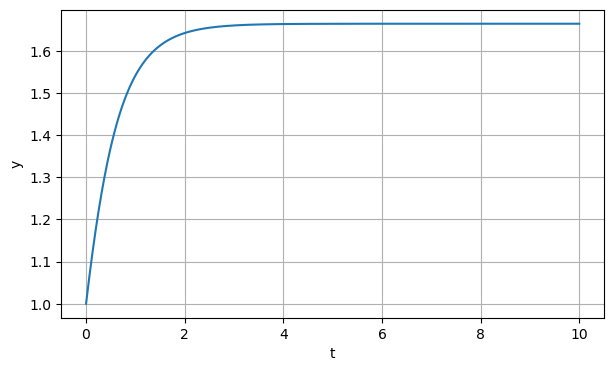

In [11]:
# (b)

def f(t, x):
    # x' = exp(-xt)
    return np.exp(-x * t)

t = np.linspace(0, 10, 1000)
x = trapezoidal_method(f, 1, t)
doaplot(t, x)

Again, using the trapezoidal method, we were able to solve for the equation above. This equation is non-stiff.

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_7201/3921568483.py:5: RuntimeWarning: overflow encountered in scalar power
  return (x ** 2) * (t ** 2) + 1


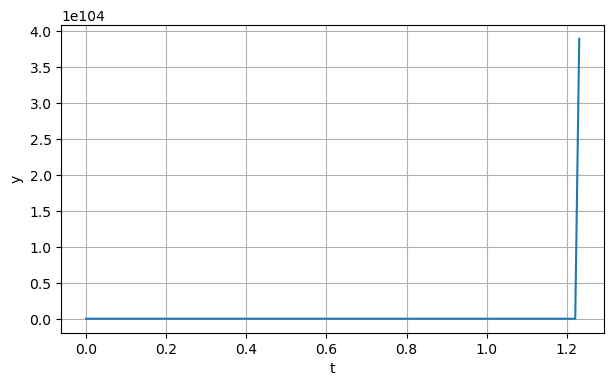

In [60]:
# (c) first attempt using non-stiff methods

def f(t, x):
    # x' = x^2 t^2 + 1
    return (x ** 2) * (t ** 2) + 1

t = np.linspace(0, 10, 1000)
x = trapezoidal_method(f, 1, t)
doaplot(t, x)

The non-stiff trapezoidal method did not work. This means that this DE is stiff and we should use the implicit trapezoidal method for stiff equations.

In [64]:
# (c) second attempt using stiff methods

t = np.linspace(0, 10, 1000)
x = implicit_trapezoidal_method(f, 1, t)
doaplot(t, x)

RuntimeError: Failed to converge after 50 iterations, value is 19.75919951348317.

Now the DE returns normally. Yay!

**Problem 3**

Consider the central force problem described by the orbit equation in polar coordinates $r, \varphi$ 

$$
\frac{dr}{d\varphi}=\frac{m\,r^2}{\ell}\sqrt{\frac{2\,E}{m}-\frac{\ell^2}{m^2r^2}-\frac{2}{m}\frac{k}{r}}
$$

The solution to this differential equation $r(\varphi)$ traces out the trajectory of an object of mass $m$, energy $E$, and angular momentum $\ell$. $k$ is another constant that the determines the strength of the central force pulling on the object. 

(a) By writing this equation in terms of a dimensionless radial coordinate, show that the only scale in the problem is the combination 

$$
\frac{k}{\ell}\sqrt{\frac{m}{E}}
$$

(b) The eccentricity of the orbit is defined as

$$
\varepsilon\equiv \sqrt{1+\frac{2\,\ell^2 E}{k^2 m }}
$$

range from zero to infinity. Solve numerically the differential equation and plot the solution for various values of $\varepsilon$ (e.g. 0, 0.2, 0.75, 1, 1.5).

**Solution:**
In (a) we proved that
$$ r(\varphi) = \frac{\ell}{\sqrt{2mE}} r_0(\varphi), $$
where $r_0(\varphi)$ satisfies that
$$ \frac{dr_0}{d\varphi} = r_0 \sqrt{r_0^2 - \sqrt{2}br_0 - 1}, $$
where $b = \frac{k}{\ell} \sqrt{\frac{m}{E}}$. Since the eccentricity is defined as
$$ \epsilon \equiv \sqrt{1+\frac{2\ell^2 E}{k^2m}}, $$
we can write it as
$$ \epsilon = \sqrt{1+\frac{2}{b^2}}. $$
Using this, we can rewrite $b$ as
$$ b = \sqrt{\frac{2}{\epsilon^2 - 1}}. $$
This means that the differential equation above can be rewritten as
$$ \frac{dr_0}{d\varphi} = r_0 \sqrt{r_0^2 - 2\sqrt{\frac{1}{\epsilon^2 - 1}} r_0 - 1}. $$

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_89012/607460040.py:6: RuntimeWarning: overflow encountered in scalar power
  return r0 * (r0**2 - 2*g*r0 - 1) ** (1/2)
/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_89012/607460040.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  return r0 * (r0**2 - 2*g*r0 - 1) ** (1/2)


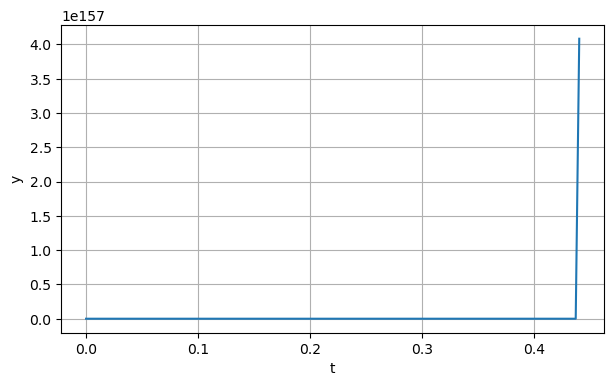

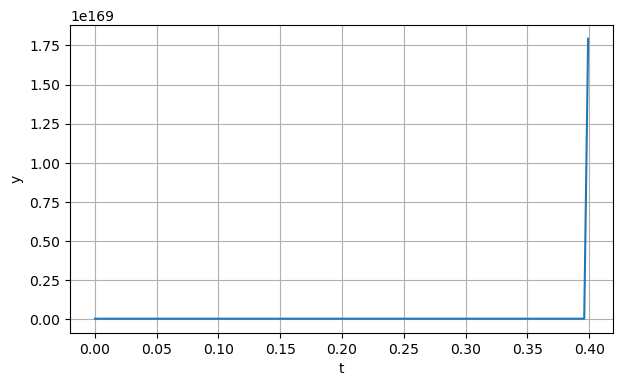

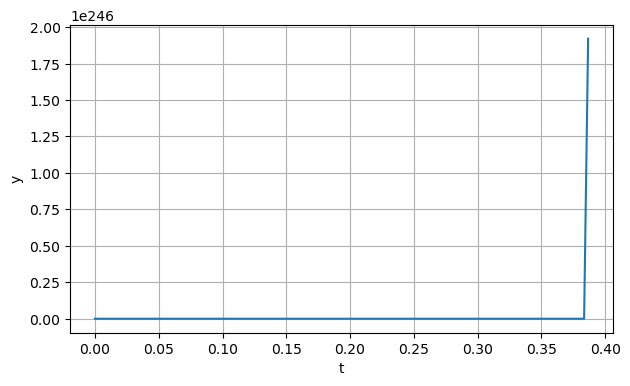

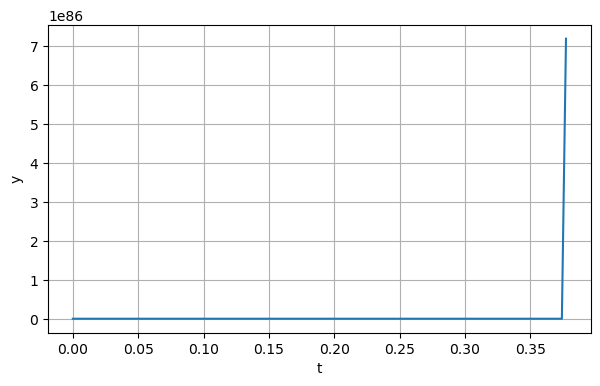

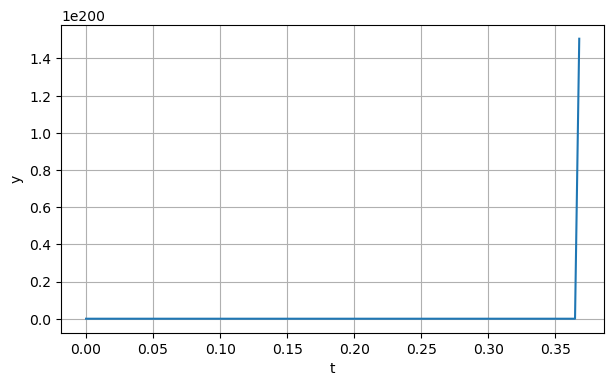

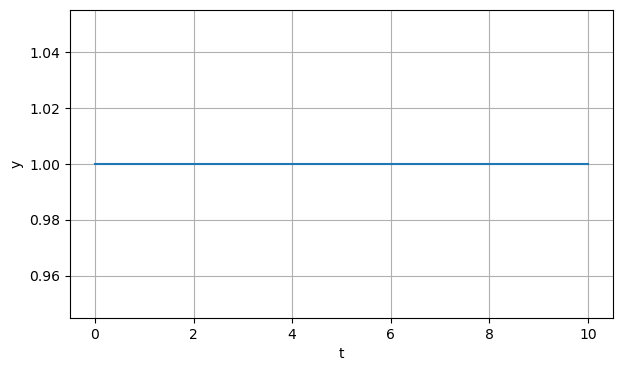

In [15]:
def f_temp(phi, r0, epsilon):
    if epsilon == 1:
        return 0
    else:
        g = (1/(epsilon **2 - 1)) ** (1/2)
        return r0 * (r0**2 - 2*g*r0 - 1) ** (1/2)

for epsilon in [1.5,2,2.5,3, 5]:
    def f(phi, r0):
        return f_temp(phi, r0, epsilon)
    t = np.linspace(0, 2*np.pi, 2000)
    x = trapezoidal_method(f, 3, t)
    x = np.abs(x)
    doaplot(t, x)
    
# use solve_ivp to solve the ODE
from scipy.integrate import solve_ivp

def f(t, x):
    return np.array([x[1], x[0] - x[0] ** 3])

t = np.linspace(0, 10, 1000)
x = solve_ivp(f, [0, 10], [1, 0], t_eval=t)
doaplot(x.t, x.y[0])